# Merging data 

In [2]:
from patients import getTargetPatientIcu


dfPatient = getTargetPatientIcu()
dfPatient = dfPatient[["subject_id", "hadm_id", "stay_id"]]
dfPatient

,subject_id,hadm_id,stay_id
0,19277038,20027438,30213832
1,17405009,20041225,32710335
2,19054290,20046699,30643955
3,19523386,20053996,32939862
4,10924444,20065893,31555593
...,...,...,...
1208,14320833,29970786,34923650
1209,13494531,29971659,35179120
1210,11389314,29991667,30620060
1211,12136570,29992577,31780258


Exclude all variables with missing values > 20%. Variables' length must be >= 

In [3]:
len(dfPatient) * 80 / 100

970.4

## AKD Positive

In [4]:
import akd_positive


dfAkd = akd_positive.extractKdigoStages7day()
dfAkd["akd"] = dfAkd["aki_7day"]
dfAkd = dfAkd[["stay_id", "akd"]]

dfData1 = dfPatient.merge(dfAkd, "left", "stay_id")
dfData1["akd"] = dfData1["akd"].astype(bool)

dfData1

,subject_id,hadm_id,stay_id,akd
0,19277038,20027438,30213832,False
1,17405009,20041225,32710335,False
2,19054290,20046699,30643955,False
3,19523386,20053996,32939862,False
4,10924444,20065893,31555593,False
...,...,...,...,...
1208,14320833,29970786,34923650,True
1209,13494531,29971659,35179120,False
1210,11389314,29991667,30620060,False
1211,12136570,29992577,31780258,True


## Diabetes' characteristics 

Missing value here is associated with False/NotHappened

### Macroangiopathy

In [5]:
import variables_charateristics_diabetes


df = variables_charateristics_diabetes.getMacroangiopathy()
df

/media/data3/users/tubh/PredictingRiskDiabeticKetoacidosis-associatedKidneyInjury/variables_charateristics_diabetes/macroangiopathy.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCoronary["coronary"] = True
/media/data3/users/tubh/PredictingRiskDiabeticKetoacidosis-associatedKidneyInjury/variables_charateristics_diabetes/macroangiopathy.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCA["ca"] = True
/media/data3/users/tubh/PredictingRiskDiabeticKetoacidosis-associatedKidneyInjury/variables_ch

,hadm_id,macroangiopathy
0,20764029,True
1,24506973,True
2,25339060,True
3,25339060,True
4,20376756,True
...,...,...
464,28579208,True
465,28184093,True
466,29570938,True
467,21391596,True


In [6]:
dfData2 = dfData1.merge(df, "left", "hadm_id")
dfData2["macroangiopathy"].fillna(False, inplace=True)

### Microangiopathy

In [7]:
import variables_charateristics_diabetes


df = variables_charateristics_diabetes.getMicroangiopathy()
df

/media/data3/users/tubh/PredictingRiskDiabeticKetoacidosis-associatedKidneyInjury/variables_charateristics_diabetes/microangiopathy.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfRes["dn"] = True
/media/data3/users/tubh/PredictingRiskDiabeticKetoacidosis-associatedKidneyInjury/variables_charateristics_diabetes/microangiopathy.py:383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfRes["dr"] = True
/media/data3/users/tubh/PredictingRiskDiabeticKetoacidosis-associatedKidneyInjury/variables_charaterist

,hadm_id,microangiopathy
0,26400739,True
1,22497183,True
2,26892213,True
3,23946068,True
4,24307428,True
...,...,...
297,29464182,True
298,24522871,True
299,27329170,True
300,20046699,True


In [8]:
dfData3 = dfData2.merge(df, "left", "hadm_id")
dfData3["microangiopathy"].fillna(False, inplace=True)

## Demographics

### Age

In [9]:
import variables_demographics


df = variables_demographics.getAge()
df


,stay_id,age
0,30213832,64
1,30970799,64
2,37192412,64
3,32657820,63
4,32710335,39
...,...,...
1208,31559071,82
1209,31044383,71
1210,35179120,76
1211,31780258,56


In [10]:
dfData4 = dfData3.merge(df, "outer", "stay_id")

### Gender

In [11]:
df = variables_demographics.getGender()
df


,stay_id,gender
0,30213832,F
1,30970799,F
2,37192412,F
3,32657820,F
4,32710335,F
...,...,...
1208,31559071,M
1209,31044383,M
1210,35179120,M
1211,31780258,M


In [12]:
dfData5 = dfData4.merge(df, "outer", "stay_id")

### Ethnicity

In [13]:
df = variables_demographics.getEthnicity()
df


,stay_id,race
0,30213832,HISPANIC/LATINO - DOMINICAN
1,32710335,BLACK/AFRICAN AMERICAN
2,30643955,WHITE
3,32939862,WHITE
4,31555593,WHITE
...,...,...
1208,34923650,WHITE
1209,35179120,WHITE
1210,30620060,WHITE
1211,31780258,BLACK/AFRICAN AMERICAN


In [14]:
dfData6 = dfData5.merge(df, "outer", "stay_id")

### Height

missing to many values

In [15]:
df = variables_demographics.getHeight()
df


,stay_id,height
0,35024147,165.10
1,35024147,165.00
2,30109052,157.48
3,30109052,157.00
4,39804682,152.40
...,...,...
825,32770235,160.00
826,37038532,160.02
827,37038532,160.00
828,30516447,162.56


### Weight

In [16]:

df = variables_demographics.getWeight()
df


,stay_id,weight
0,30002521,91.6
1,30006067,75.5
2,30007216,60.3
4,30012944,69.0
6,30033055,144.0
...,...,...
3098,39947352,71.4
3100,39954251,68.0
3101,39961214,50.2
3102,39968693,83.6


In [17]:
dfData7 = dfData6.merge(df, "outer", "stay_id")

## Interventions

Missing value here is associated with patient didn't received the intervention

### Mechanical ventilation

In [18]:
import variables_interventions


df = variables_interventions.getMV()
df

,stay_id,mechanical_ventilation
14,38986741,True
29,32059250,True
37,38085457,True
46,33378526,True
109,31880025,True
...,...,...
644,38339991,True
652,30629301,True
660,39339368,True
665,33484600,True


In [19]:
dfData8 = dfData7.merge(df, "left", "stay_id")
dfData8["mechanical_ventilation"].fillna(False, inplace=True)

### Continuous renal replacement therapy

In [20]:
df = variables_interventions.getCrrt()
df

,stay_id,use_crrt
8,34230481,True
11,34749119,True
17,35391360,True
18,34372001,True
22,34600139,True


In [21]:
dfData9 = dfData8.merge(df, "left", "stay_id")
dfData9["use_crrt"].fillna(False, inplace=True)

### Use of NaHCO3

In [22]:
df = variables_interventions.getNaHCO3()
df

,stay_id,use_NaHCO3
0,30109052,True
2,30033055,True
7,35505901,True
11,35085974,True
16,34569551,True
...,...,...
318,38493497,True
324,37099881,True
325,31880025,True
328,39298269,True


In [23]:
dfData10 = dfData9.merge(df, "left", "stay_id")
dfData10["use_NaHCO3"].fillna(False, inplace=True)

## Laboratory tests

#### White blood cell

In [24]:
import variables_lab_test

df = variables_lab_test.getWbc().dropna()
df

,stay_id,wbc
0,30002521,2.8
1,30006067,7.3
2,30007216,3.1
3,30012944,11.7
4,30033055,18.5
...,...,...
1207,39939904,8.0
1208,39947352,20.8
1210,39961214,11.8
1211,39968693,18.9


In [25]:
dfData11 = dfData10.merge(df, "left", "stay_id")

### Lymphocyte

In [26]:
df = variables_lab_test.getLymphocyte().dropna()
df

,stay_id,lymphocyte
4,30033055,2.1275
5,30037325,1.2500
6,30043033,1.7040
13,30108775,3.8410
14,30109052,0.3800
...,...,...
1204,39910548,2.8542
1207,39939904,0.9200
1208,39947352,0.8320
1210,39961214,1.0384


Missing too many values

### Hemoglobin

In [27]:
df = variables_lab_test.getHb().dropna()
df

,stay_id,hb
0,30002521,8.6
1,30006067,11.8
2,30007216,8.7
3,30012944,10.1
4,30033055,15.2
...,...,...
1207,39939904,12.6
1208,39947352,11.7
1210,39961214,10.9
1211,39968693,12.5


In [28]:
dfData12 = dfData11.merge(df, "left", "stay_id")

### Plateles

In [29]:
df = variables_lab_test.getPlt().dropna()
df

,stay_id,plt
0,30002521,171.0
1,30006067,234.0
2,30007216,102.0
3,30012944,266.0
4,30033055,340.0
...,...,...
1207,39939904,349.0
1208,39947352,139.0
1210,39961214,580.0
1211,39968693,318.0


In [30]:
dfData13 = dfData12.merge(df, "left", "stay_id")

### Partial pressure of O2
Missing too many values

In [31]:
df = variables_lab_test.getPO2().dropna()
df

,stay_id,po2
0,30002521,55.0
1,30006067,61.0
2,30007216,41.0
3,30012944,52.0
4,30033055,68.0
...,...,...
912,39911720,47.0
913,39939904,54.0
914,39947352,64.0
915,39968693,73.0


### Partial pressure of CO2
Missing too many values

In [32]:
df = variables_lab_test.getPCO2().dropna()
df

,stay_id,pco2
0,30002521,38.0
1,30006067,38.0
2,30007216,34.0
3,30012944,36.0
4,30033055,38.0
...,...,...
912,39911720,28.0
913,39939904,23.0
914,39947352,15.0
915,39968693,24.0


### pH
Missing too many values

In [33]:
df = variables_lab_test.get_pH().dropna()
df

,stay_id,ph
0,30002521,7.28
1,30006067,7.38
2,30007216,7.39
3,30012944,7.38
4,30033055,7.29
...,...,...
949,39919046,7.37
950,39939904,7.16
951,39947352,6.87
952,39968693,7.02


### Anion gap

In [34]:
df = variables_lab_test.getAG().dropna()
df

,stay_id,ag
0,30002521,12.0
1,30006067,33.0
2,30007216,24.0
3,30012944,11.0
4,30033055,18.0
...,...,...
1208,39947352,32.0
1209,39954251,22.0
1210,39961214,23.0
1211,39968693,42.0


In [35]:
dfData14 = dfData13.merge(df, "left", "stay_id")

### Bicarbonate

In [36]:
df = variables_lab_test.getBicarbonate().dropna()
df

,stay_id,bicarbonate
0,30002521,17.0
1,30006067,10.0
2,30007216,13.0
3,30012944,18.0
4,30033055,21.0
...,...,...
1208,39947352,5.0
1209,39954251,17.0
1210,39961214,20.0
1211,39968693,7.0


In [37]:
dfData15 = dfData14.merge(df, "left", "stay_id")

### Blood urea nitrogen

In [38]:
df = variables_lab_test.getBun().dropna()
df

,stay_id,bun
0,30002521,17.0
1,30006067,18.0
2,30007216,29.0
3,30012944,8.0
4,30033055,16.0
...,...,...
1208,39947352,38.0
1209,39954251,22.0
1210,39961214,35.0
1211,39968693,60.0


In [39]:
dfData16 = dfData15.merge(df, "left", "stay_id")

### Calcium

In [40]:
df = variables_lab_test.getCalcium().dropna()
df

,stay_id,calcium
0,30002521,7.5
1,30006067,8.4
2,30007216,7.2
3,30012944,8.2
4,30033055,6.6
...,...,...
1208,39947352,8.3
1209,39954251,8.9
1210,39961214,8.9
1211,39968693,8.7


In [41]:
dfData17 = dfData16.merge(df, "left", "stay_id")

### Serum creatinine

In [42]:
df = variables_lab_test.getScr().dropna()
df

,stay_id,scr
0,30002521,0.6
1,30006067,1.2
2,30007216,1.3
3,30012944,0.7
4,30033055,1.4
...,...,...
1208,39947352,1.7
1209,39954251,1.0
1210,39961214,1.2
1211,39968693,2.4


In [43]:
dfData18 = dfData17.merge(df, "left", "stay_id")

### Blood glucose

In [44]:
df = variables_lab_test.getBg().dropna()
df

,stay_id,bg
0,30002521,246.0
1,30006067,484.0
2,30007216,372.0
3,30012944,244.0
4,30033055,198.0
...,...,...
1208,39947352,708.0
1209,39954251,193.0
1210,39961214,347.0
1211,39968693,1022.0


In [45]:
dfData19 = dfData18.merge(df, "left", "stay_id")

### Phosphate

In [46]:
df = variables_lab_test.getPhosphate().dropna()
df

,stay_id,phosphate
0,30002521,3.6
1,30006067,3.1
2,30007216,0.7
3,30012944,1.9
4,30033055,4.8
...,...,...
1199,39947352,5.4
1200,39954251,2.2
1201,39961214,4.1
1202,39968693,9.7


In [47]:
dfData20 = dfData19.merge(df, "left", "stay_id")

### Albumin
Too many missing values

In [48]:
df = variables_lab_test.getAlbumin().dropna()
df

,stay_id,albumin
1,30006067,3.4
4,30033055,4.2
7,30048200,3.3
9,30050800,3.8
11,30102806,3.6
...,...,...
1207,39939904,3.7
1208,39947352,3.4
1210,39961214,3.1
1211,39968693,3.1


In [49]:
dfData21 = dfData20.merge(df, "left", "stay_id")

### Estimated glomerular filtration rate

In [50]:
df = variables_lab_test.get_eGFR().dropna()
df

,stay_id,egfr
0,30002521,110.860746
1,30006067,61.024887
2,30007216,46.801692
3,30012944,123.856724
4,30033055,44.010194
...,...,...
1208,39947352,31.765051
1209,39954251,73.448571
1210,39961214,57.286227
1211,39968693,23.591182


In [51]:
dfData22 = dfData21.merge(df, "left", "stay_id")

### HemoglobinA1c
Too many missing values

In [52]:
df = variables_lab_test.getHbA1C().dropna()
df

,stay_id,hba1c
0,30033055,6.9
1,30037325,13.3
2,30050739,15.6
3,30137988,8.1
4,30161427,10.8
...,...,...
321,39770639,11.5
322,39802379,10.1
323,39910548,14.0
324,39919046,8.0


### C-reactive protein
Too many missing values

In [53]:
df = variables_lab_test.getCrp().dropna()
df

,stay_id,crp
0,30508046,32.3
1,30754159,205.7
3,32083537,218.7
4,32496174,264.0
5,32569912,220.4
6,33026932,168.2
7,33060916,23.8
8,33112351,152.4
9,33758365,208.5
10,33901074,207.9


### Urine Ketone
Too many missing values

In [54]:
df = variables_lab_test.getUrineKetone().dropna()
df

,stay_id,urine-ketone
1,30048200,15.0
2,30050739,150.0
3,30102806,10.0
5,30215972,150.0
7,30251210,10.0
...,...,...
430,39858156,150.0
431,39878656,150.0
433,39919046,10.0
434,39939904,150.0


## Scoring systems

### Glasgow coma scale

In [55]:
import variables_scoring_systems


df = variables_scoring_systems.getGcs().dropna()
df

,stay_id,gcs
0,30002521,15.0
1,30006067,15.0
2,30007216,15.0
3,30012944,14.0
4,30033055,15.0
...,...,...
1206,39947352,12.0
1207,39954251,15.0
1208,39961214,15.0
1209,39968693,14.0


In [56]:
dfData23 = dfData22.merge(df, "left", "stay_id")

### Oasis

In [57]:
from variables_scoring_systems import getOasis


df = getOasis().dropna()
df

,stay_id,oasis
0,30002521,23.0
1,30006067,18.0
2,30007216,30.0
3,30012944,23.0
4,30033055,46.0
...,...,...
1208,39947352,30.0
1209,39954251,21.0
1210,39961214,20.0
1211,39968693,27.0


In [58]:
dfData24 = dfData23.merge(df, "left", "stay_id")

### Others
TODO: add later

## Vital signs

### Heart Rate

In [60]:
from variables_vital_signs import getHeartRate


df = getHeartRate().dropna()
df

,stay_id,hr
0,30002521,98.0
1,30006067,105.0
2,30007216,128.0
3,30012944,90.0
4,30033055,136.0
...,...,...
1208,39947352,100.0
1209,39954251,103.0
1210,39961214,97.0
1211,39968693,112.0


In [61]:
dfData25 = dfData24.merge(df, "left", "stay_id")

### Respiratory Rate

In [66]:
from variables_vital_signs import getRespiratoryRate


df = getRespiratoryRate().dropna()
df

,stay_id,rr
0,30002521,33.0
1,30006067,16.0
2,30007216,34.0
3,30012944,19.0
4,30033055,22.0
...,...,...
1208,39947352,16.0
1209,39954251,16.0
1210,39961214,17.0
1211,39968693,27.0


In [71]:
dfData26 = dfData25.merge(df, "left", "stay_id")

### Systolic Blood Pressure

In [72]:
from variables_vital_signs import getSystolicBloodPressure


df = getSystolicBloodPressure().dropna()
df

,stay_id,sbp
0,30002521,129.0
1,30006067,139.0
2,30007216,138.0
3,30012944,105.0
4,30033055,114.0
...,...,...
1208,39947352,90.0
1209,39954251,122.0
1210,39961214,126.0
1211,39968693,142.0


In [73]:
dfData27 = dfData26.merge(df, "left", "stay_id")

### Diastolic Blood Pressure

In [76]:
from variables_vital_signs import getDiastolicBloodPressure


df = getDiastolicBloodPressure().dropna()
df

,stay_id,dbp
0,30002521,68.0
1,30006067,61.0
2,30007216,77.0
3,30012944,58.0
4,30033055,85.0
...,...,...
1208,39947352,61.0
1209,39954251,53.0
1210,39961214,71.0
1211,39968693,66.0


In [77]:
dfData28 = dfData27.merge(df, "left", "stay_id")

## Prognosis

### How long patients stayed in hospital before Icu admission

In [79]:
from variables_prognosis import getPreIcuLos


df = getPreIcuLos().dropna()
df

,stay_id,preiculos
0,30002521,1.266667
1,30006067,70.000000
2,30007216,63.000000
3,30012944,136.000000
4,30033055,103.433333
...,...,...
1208,39947352,95.000000
1209,39954251,42.000000
1210,39961214,181.333333
1211,39968693,0.800000


In [80]:
dfData29 = dfData28.merge(df, "left", "stay_id")

In [82]:
dfData29.dtypes

subject_id                  int64
hadm_id                     int64
stay_id                     int64
akd                          bool
macroangiopathy              bool
microangiopathy              bool
age                         int64
gender                     object
race                       object
weight                    float64
mechanical_ventilation       bool
use_crrt                     bool
use_NaHCO3                   bool
wbc                       float64
hb                        float64
plt                       float64
ag                        float64
bicarbonate               float64
bun                       float64
calcium                   float64
scr                       float64
bg                        float64
phosphate                 float64
albumin                   float64
egfr                      float64
gcs                       float64
oasis                     float64
hr                        float64
sbp_x                     float64
sbp_y         

## XGBOOST

In [9]:
import pandas as pd
from constants import TEMP_PATH

dfMergedData = pd.read_csv(TEMP_PATH / "dfMergedData.csv")

dfMergedData.drop(columns= ["Unnamed: 0", "stay_id", "intime", "outtime"], inplace=True, )

dfMergedData["marital_status"] = dfMergedData["marital_status"].astype("category")
dfMergedData["race"] = dfMergedData["race"].astype("category")
dfMergedData["gender"] = dfMergedData["gender"].astype("category")



dfMergedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   marital_status  1999 non-null   category
 1   race            2304 non-null   category
 2   gender          2304 non-null   category
 3   anchor_age      2304 non-null   int64   
 4   will_akd        2304 non-null   bool    
 5   sugar0          1855 non-null   float64 
 6   sugar1          1818 non-null   float64 
 7   sugar2          1783 non-null   float64 
 8   sugar3          1716 non-null   float64 
 9   sugar4          1655 non-null   float64 
 10  sugar5          1578 non-null   float64 
 11  urine_output0   2304 non-null   int64   
 12  urine_output1   2304 non-null   int64   
 13  urine_output2   2304 non-null   int64   
 14  urine_output3   2304 non-null   int64   
 15  urine_output4   2304 non-null   int64   
 16  urine_output5   2304 non-null   int64   
 17  weight0       

In [29]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

X = dfMergedData.drop("will_akd", axis=1)
y = dfMergedData["will_akd"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=57)

print(len(X_train), len(X_test))

dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)


1612 692


In [30]:
# Define parameters for XGBoost
params = {
    'max_depth': 100,  # maximum depth of the tree
    'learning_rate': 0.01,  # learning rate
    # 'objective': 'multi:softmax',  # objective function
    'num_class': len(y.unique()),  # number of classes
    'eval_metric': 'merror'  # evaluation metric
}

# Train the XGBoost model
num_rounds = 1000  # number of boosting rounds
model = xgb.train(params, dtrain, num_rounds)

# Make predictions
y_pred = model.predict(dtest)

In [32]:
import sklearn.metrics as metrics

y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred_binary)
auc = metrics.roc_auc_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred_binary)
recall = metrics.recall_score(y_test, y_pred_binary)
f1 = metrics.f1_score(y_test, y_pred_binary)


# Print evaluation metrics
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9898843930635838
AUC: 0.5
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/media/data3/users/tubh/PredictingRiskDiabeticKetoacidosis-associatedKidneyInjury/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


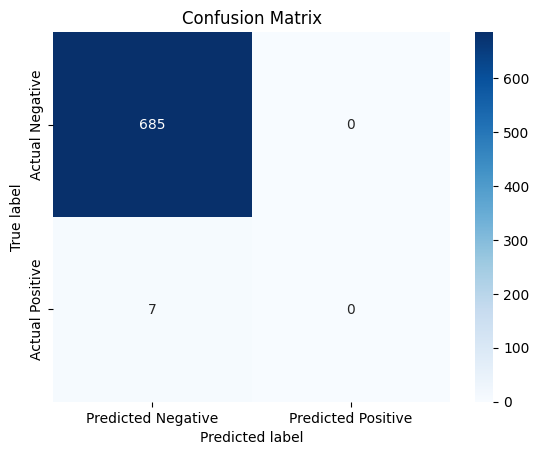

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()